# Emerging Technologies Project

This file contains the research, progress and the different machine learning models used for my final year module Emerging Technologies project.
<br>
Author: William Vida.
<br>
Lecturer: Dr Ian McLoughlin.

***
## Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.

To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.

***
## Research
### Wind Turbines
Wind Turbines convert kinetic energy from the wind to form mechanical or electrical energy that can be used for power. Wind turbines produce electricity by using rotational energy to drive an electrical generator. They are made up of a blade or rotor, and an enclosure called a nacelle that contains a drive train on top of a tall tower [3].

<img src="https://cdn.britannica.com/48/121648-050-496C79EF/Components-wind-turbine.jpg" title="Wind Turbine" alt="Wind Turbine" width="50%">

### Machine Learning
Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the premise that, with minimal human interaction, systems can learn from data, recognise trends and make decisions [1].

In data science, an algorithm is a series of steps for statistical processing. In machine learning, algorithms are "trained" to identify patterns and features for a large number of quantities of data to make new data-based decisions and predictions. The better the algorithm, the more accurate the decisions and the predictions will become as it processes more data [1].

### How Machine Learning Works
There are four steps for building a machine learning application (or model) [1].

**Step 1: Select and prepare a training data set**
<br>
Training data is a data set that the machine learning model uses to solve the problem it is designed to solve. In certain instances, the training data is labelled data—"tagged" to identify the features and classifications that the model would need to identify. Other data is unlabelled, and the model will need to extract those features and assign classifications on its own. In either case, the training data needs to be reviewed to reduce the risk of biases the could affect the training.

**Step 2: Choose an algorithm to run on the training data set**
<br>
The type of algorithm depends on the type (labelled/supervised learning or unlabelled/unsupervised learning), the amount of data in the training data set and the type of problem that has to be solved. Machine learning algorithms for labelled data sets include regression algorithms, decision trees and instance-based algorithms. While machine learning algorithms for unlabelled data sets include clustering algorithms, association algorithms and neural networks.

**Step 3: Training the algorithm to create the model**
<br>
Training the algorithm is an iterative process. It involves running variables through the algorithm, comparing the output with the expected output, minimise biases in the algorithm, and running through the variables again until the algorithm produces an accurate result most of the time. The resulting trained, accurate algorithm is the machine learning model.

**Step 4: Using and improving the model**
<br>
The model is used with new data to improve its accuracy and effectiveness.

### Supervised Machine Learning
Supervised machine learning trains itself on a labelled data set. The data is labelled with information that the machine learning model can determine how the model classifies the data. Supervised machine learning requires less training data than other machine learning methods and makes training simpler since the outputs of the model can be compared to the actual labelled results [1].

### Unsupervised Machine Learning
Unsupervised machine learning uses an unlabelled data set. It uses algorithms to extract important features needed to label, sort and classify the data in real-time and without human intervention. Unsupervised learning is less about automating decisions and predictions but more about identifying patterns and relationships in data [1].

***
## The Data

In [1]:
import numpy as np
import statsmodels.stats.weightstats as stat
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import csv
from numpy.polynomial.polynomial import polyfit
from statistics import mean
import tensorflow.keras as kr
import sklearn.cluster as skcl
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import neighbors
from math import sqrt

In [2]:
# Set the file and read it.
speedPowerFile = "powerproduction.csv"
speedPower = pd.read_csv(speedPowerFile)

In [3]:
# Output the data.
speedPower

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
# Shape of the data.
speedPower.shape

(500, 2)

In [5]:
# Information about the data.
speedPower.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


***
## Graphs of the Data With the Line of Best Fit

In [6]:
# Set the style of the graphs.
plt.style.use("bmh")

# Set the size of the graphs.
plt.rcParams["figure.figsize"] = [20, 10]

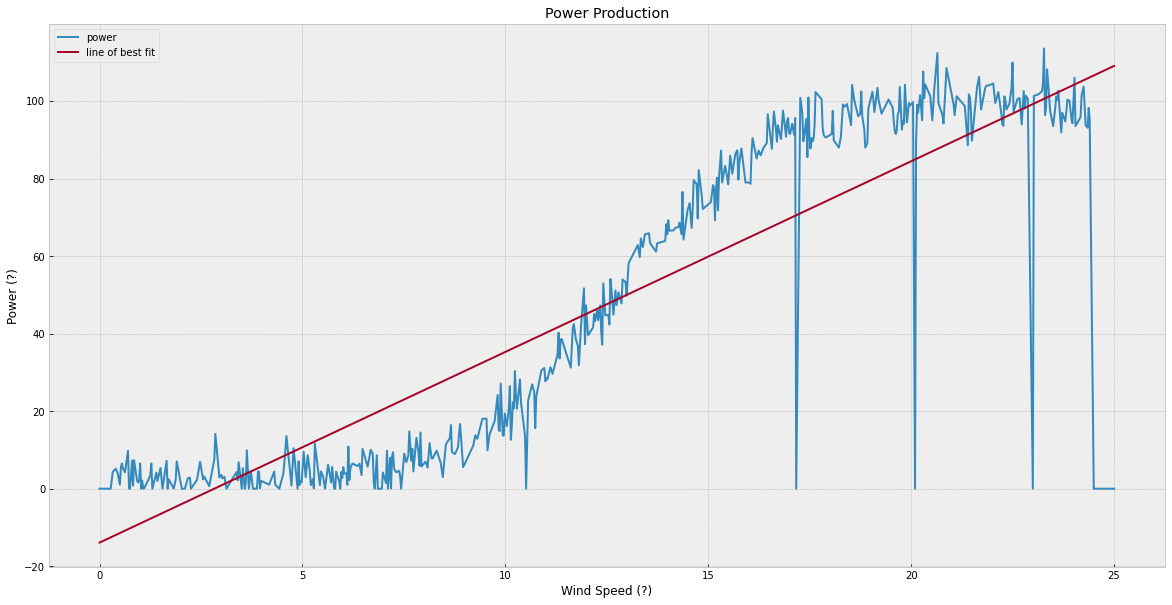

In [7]:
# Line of best fit https://stackoverflow.com/a/31800660.
speedPower.plot(x = "speed", y = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]), label = "line of best fit")
plt.title("Power Production")
plt.xlabel("Wind Speed (?)")
plt.ylabel("Power (?)")
plt.legend(loc = "upper left")
plt.show()

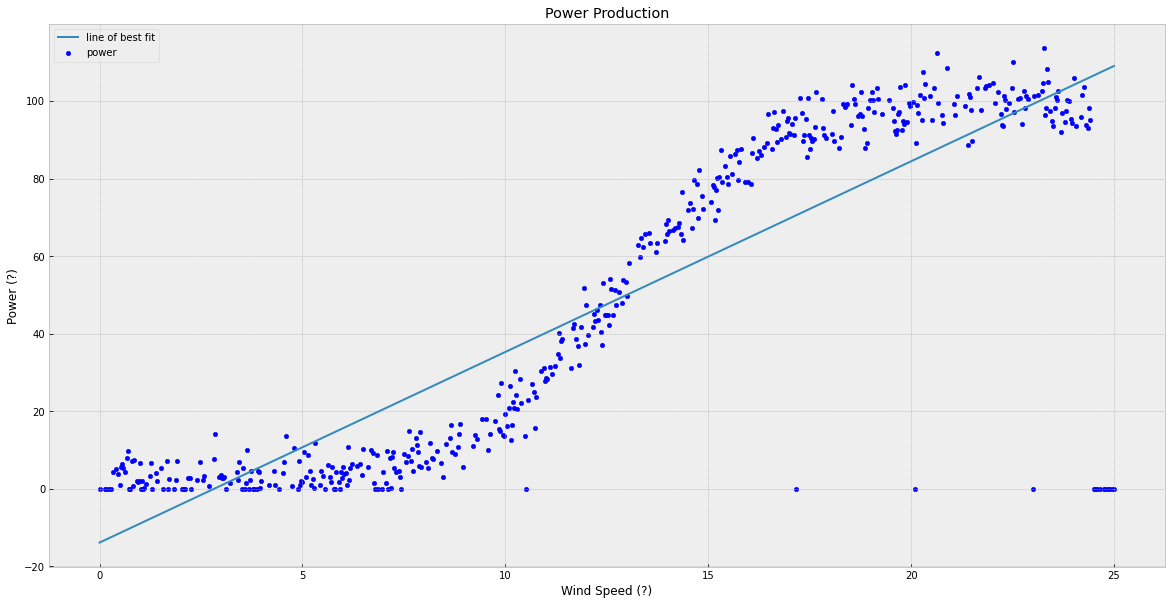

In [8]:
speedPower.plot.scatter(x = "speed", y = "power", label = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]), label = "line of best fit")
plt.title("Power Production")
plt.xlabel("Wind Speed (?)")
plt.ylabel("Power (?)")
plt.legend(loc = "upper left")
plt.show()

### Analysis of the Data and Graphs
The graphs show that most of the growth in power comes when the speed is around 7 to 17. When the speed is less than 7 and greater than 17 the power output is quite similar to a straight line but just on different places on the y-axis. The latter might be due to the dangers of high speeds and the wind turbine might shut down.

There are several outliers which must be removed as they will inflate the power predictions for certain speed inputs and especially for the highest speeds. The units of the speed and power are not given but the speed is probably measured in kilometres per hour or metres per second and the power is probably measured in megawatts or kilowatts. After doing some research, wind turbines usually measure the speed of the wind in metres per second. Unless the data is for a farm of wind turbines, there is no single wind turbine that can produce anywhere near 100 MW of power. In 2018, the most powerful wind turbine could produce 8.8 MW which is a far cry from the possible 100 MW in the data [13]. The graphs above share a similar shape with other wind turbine graphs where the speed is in metres per second and the power is in kilowatts. Henceforth, I will assume that the speed is measured in metres per second (m/s) and the power is measured in kilowatts (kW).
<img src="https://electricalacademia.com/wp-content/uploads/2018/07/Figure-1-6.png" width="50%" title="Another Graph Showing the Speed and Power Output for a Wind Turbine" alt="Another Graph Showing the Speed and Power Output for a Wind Turbine">

<img src="https://www.ndsu.edu/pubweb/~klemen/Images/BergeyXL.1_PC_SI.jpg" width="50%" title="Another Graph Showing the Speed and Power Output for a Wind Turbine" alt="Another Graph Showing the Speed and Power Output for a Wind Turbine">

***
## Remove the Outliers
The data has instances where the power output is zero even when the wind speed is zero. The zeroes must be removed as they are outliers and can cause discrepancies for the predictions. This does remove the first row where zero speed produces zero power. The outliers are removed by querying the file. The data without the zeroes will be data that will be used moving forward.

In [9]:
# Remove the zeroes.
speedPower = pd.read_csv(speedPowerFile).query("power > 0")

In [10]:
# The data without the outliers.
speedPower

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [11]:
# Shape of the data without the outliers.
speedPower.shape

(451, 2)

In [12]:
# Information about the data without the outliers.
speedPower.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


***
## Graphs of the Data Without the Outliers and With the Line of Best Fit

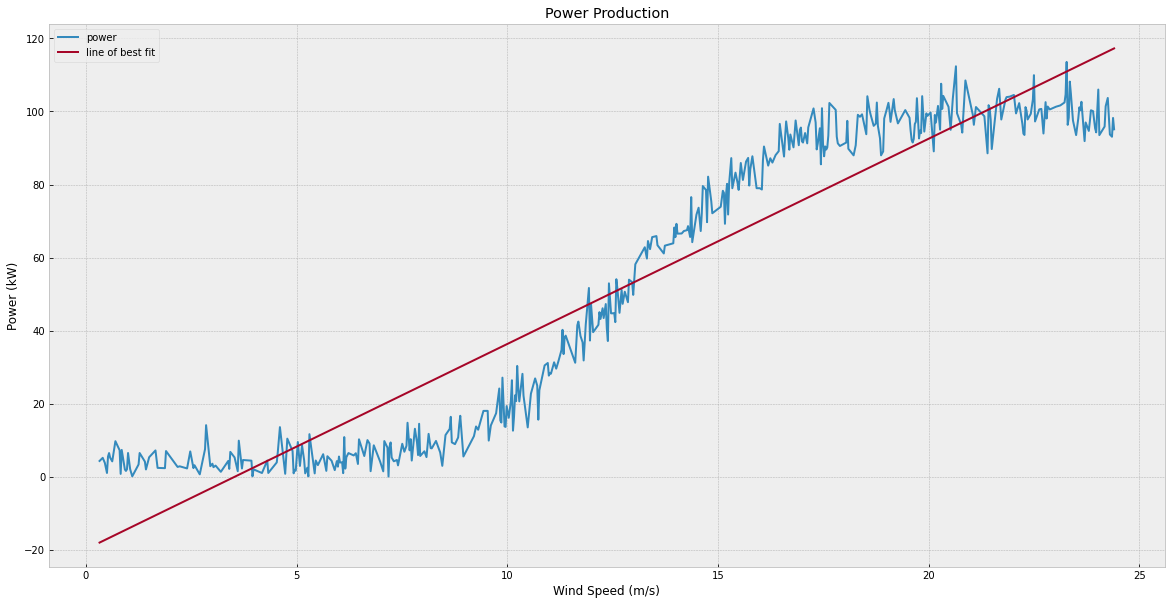

In [13]:
speedPower.plot(x = "speed", y = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]), label = "line of best fit")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

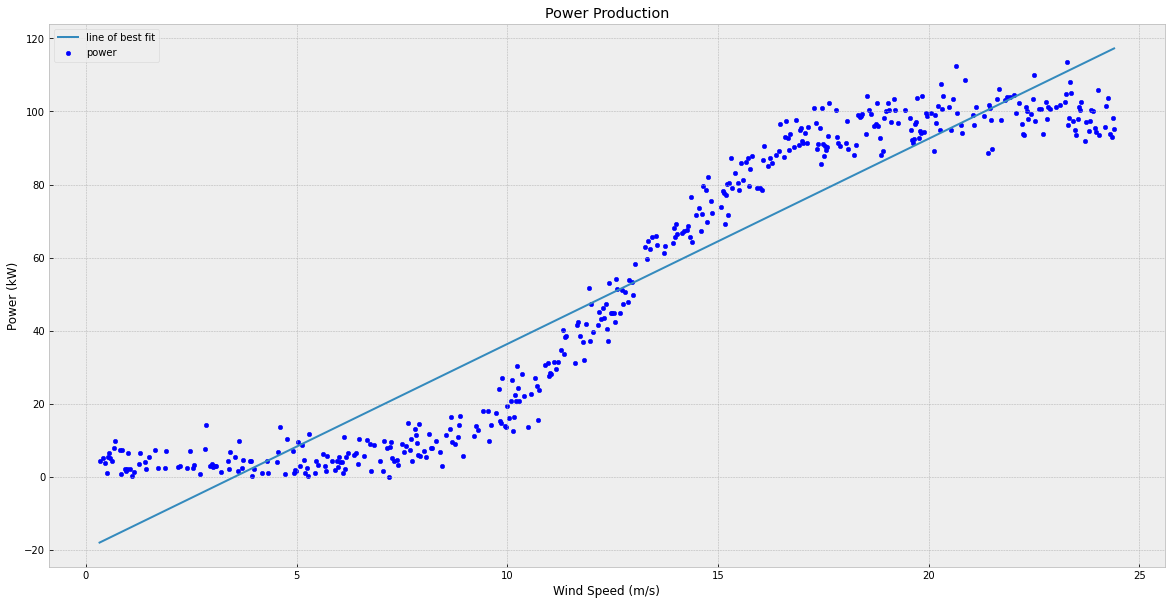

In [14]:
speedPower.plot.scatter(x = "speed", y = "power", label = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]), label = "line of best fit")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

***
## Prediction Using Linear Regression

### Research
The graph with the line of best fit shows that the data has a vaguely similar relationship to a linear model.

Linear regression is a linear model that assumes a linear relationship between an input variable and the output variable. If there is a single input then it is referred to as a simple linear regression. If there are more than one input variables then it is referred to as multiple linear regression [4].

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="60%" title="Linear Regression" alt="Linear Regression">

### Code

In [15]:
X = speedPower.iloc[:, :-1].values
y = speedPower.iloc[:, 1].values

# Fit the data.
regressor = LinearRegression()
regressor.fit(X, y)

print("y-intercept", regressor.intercept_)
print("Estimated coefficients", regressor.coef_)

y-intercept -19.837685452108396
Estimated coefficients [5.61882784]


In [16]:
input = [[4.605]]
y_pred = regressor.predict(input)

print("Input is", input, "Prediction is", y_pred, "Actual is 13.592")
print("Mean Absolute Error:", metrics.mean_absolute_error(input, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(input, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(input, y_pred)))

Input is [[4.605]] Prediction is [6.03701674] Actual is 13.592
Mean Absolute Error: 1.432016740861794
Mean Squared Error: 2.0506719461084346
Root Mean Squared Error 1.432016740861794


In [17]:
input = [[22.072]]
y_pred = regressor.predict(input)

print("Input is", input, "Prediction is", y_pred, "Actual is 99.46")
print("Mean Absolute Error:", metrics.mean_absolute_error(input, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(input, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(input, y_pred)))

Input is [[22.072]] Prediction is [104.18108258] Actual is 99.46
Mean Absolute Error: 82.10908258333959
Mean Squared Error: 6741.90144267768
Root Mean Squared Error 82.10908258333959


In [18]:
print("Test the data on wind speed values of 0, 5, 10, 15, 20, 25")
print(regressor.predict([[0], [5], [10], [15], [20], [25]]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

Test the data on wind speed values of 0, 5, 10, 15, 20, 25
[-19.83768545   8.25645374  36.35059293  64.44473211  92.5388713
 120.63301049]
0 should output 0
5 is between an output of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an output of 72.135 and 73.911
20 is between an output of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


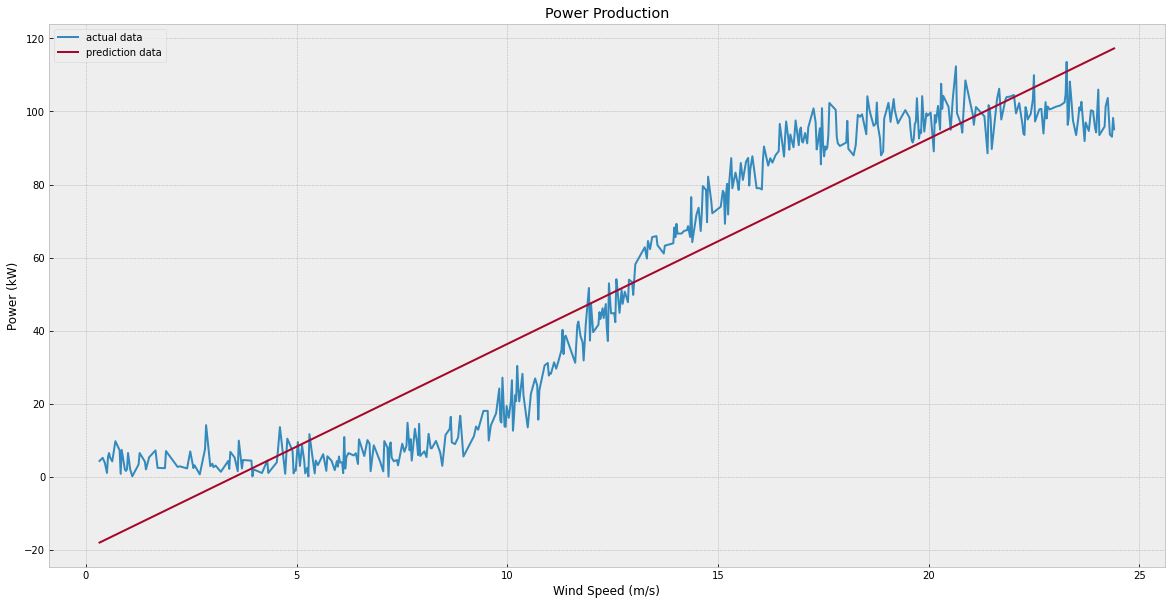

In [19]:
# Graph of the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(X, regressor.predict(X), label = "prediction data")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

#### Conclusion
Linear regression is inaccurate most of the time and it should not be used but it can be accurate for certain inputs.

***
## Prediction Using Polynomial Regression
### Research
> Polynomial Regression is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial.
<br>Polynomial Regression models are usually fit with the method of least squares [10].

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png" width="50%" title="Simple linear model vs Polynomial model" alt="Simple linear model vs Polynomial model">

### Code

In [20]:
# https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

# Set the data.
X = speedPower.iloc[:, :-1].values
y = speedPower.iloc[:, 1].values

Best degree 7 with RMSE 4.2731182471070435


Text(0, 0.5, 'RMSE')

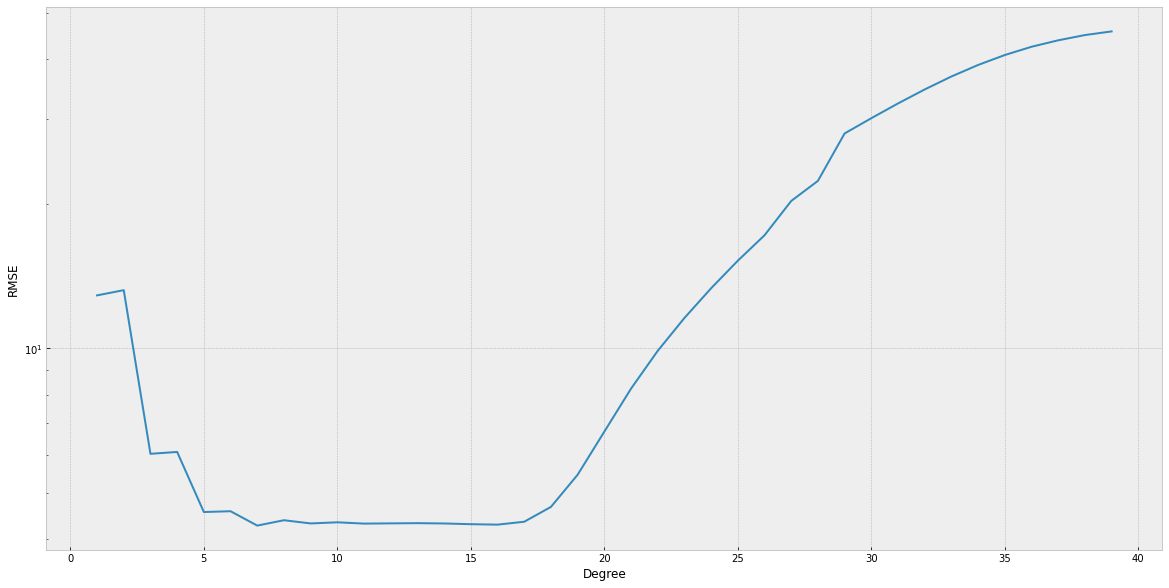

In [21]:
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

# Set the train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

# Find the optimal degree value.
rmses = []
degrees = np.arange(1, 40)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
    # Train features.
    poly_features = PolynomialFeatures(degree = deg, include_bias = False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression.
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data.
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree.
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present the results.
print("Best degree {} with RMSE {}".format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale("log")
ax.set_xlabel("Degree")
ax.set_ylabel("RMSE")

In [22]:
# Apply and fit polynomial regression to the data.
poly_reg = PolynomialFeatures(degree = 11)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [23]:
# Make some predictions.
print("Test the data on wind speed values of 0, 5, 10, 15, 20, 25")
print(pol_reg.predict(poly_reg.fit_transform([[0], [5], [10], [15], [20], [25]])))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

Test the data on wind speed values of 0, 5, 10, 15, 20, 25
[ 4.62300616  4.53479207 19.47513105 77.39074877 98.37593395 89.6483763 ]
0 should output 0
5 is between an output of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an output of 72.135 and 73.911
20 is between an output of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


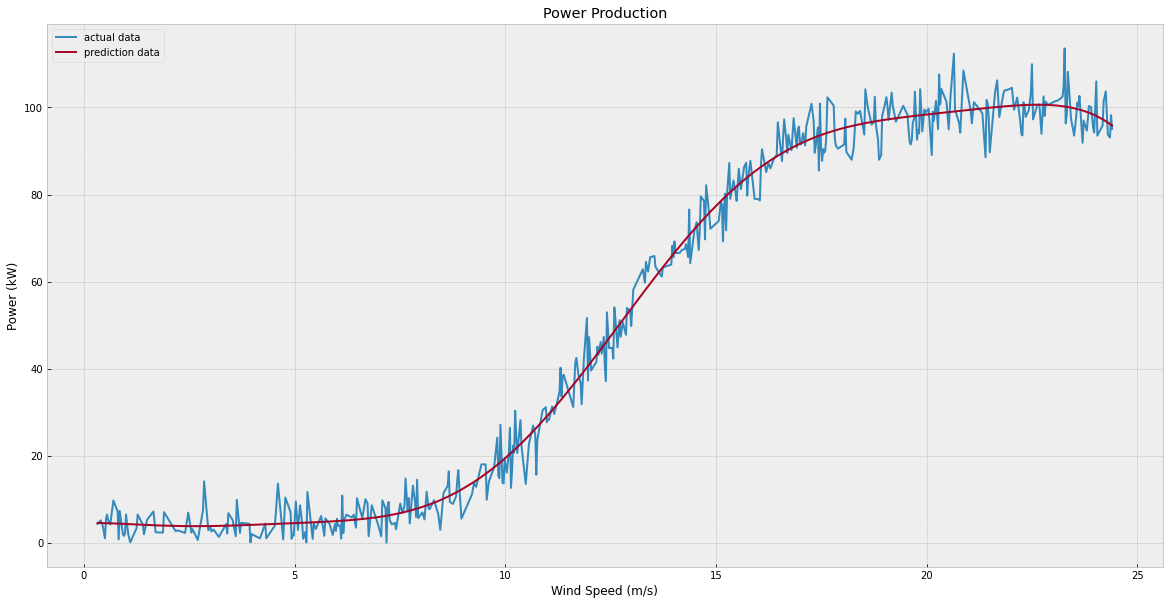

In [24]:
# Graph of the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), label = "prediction data")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

#### Conclusion
Polynomial regression is accurate for predicting the power data most of the time but when the speed input is high, as it can be seen when the speed in 25, then it outputs inaccurate power predictions.

***
## Prediction Using K-Nearest Neighbours Regression
### Research
K-nearest neighbours regression is regression based on k-nearest neighbours [5].

> In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors [6].

K-nearest neighbours is a supervised machine learning algorithm that tries to determine how likely a data point is a member of one group depending on the data points around it [2].

### Code

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

# Set the data.
X = speedPower.iloc[:, :-1].values
y = speedPower.iloc[:, 1].values

# Confirm that the correct data is being used.
speedPower

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


RMSE value for k = 1 is: 6.035746885692279
RMSE value for k = 2 is: 5.038133653980803
RMSE value for k = 3 is: 4.8359749362964575
RMSE value for k = 4 is: 4.777217675598264
RMSE value for k = 5 is: 4.73013813029116
RMSE value for k = 6 is: 4.778290894012784
RMSE value for k = 7 is: 4.753832381349458
RMSE value for k = 8 is: 4.728323052253291
RMSE value for k = 9 is: 4.7347624464451545
RMSE value for k = 10 is: 4.785450677940087
RMSE value for k = 11 is: 4.771030867331487
RMSE value for k = 12 is: 4.744417630042403
RMSE value for k = 13 is: 4.811894829253125
RMSE value for k = 14 is: 4.845372416195785
RMSE value for k = 15 is: 4.855884395322086
RMSE value for k = 16 is: 4.809388432120282
RMSE value for k = 17 is: 4.7969611991308705
RMSE value for k = 18 is: 4.698941616569233
RMSE value for k = 19 is: 4.626355465631256
RMSE value for k = 20 is: 4.626501759918512
RMSE value for k = 21 is: 4.6312281565009945
RMSE value for k = 22 is: 4.567766816482879
RMSE value for k = 23 is: 4.6368900601

<AxesSubplot:>

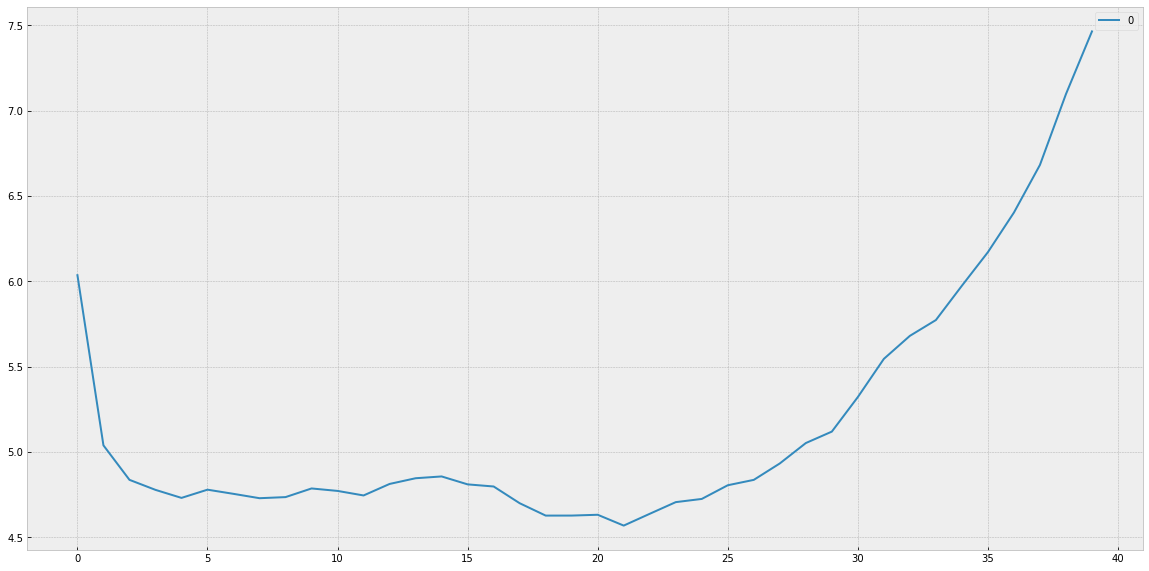

In [26]:
# https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

# Get the optimal k value.

# Set the train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

# To store root mean square error values for different k values.
rmse_val = []

# Test for a range of values.
for K in range(40):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    # Fit the model.
    model.fit(X_train, y_train)

    # Make prediction on the test set.
    pred = model.predict(X_test)

    # Calculate the RMSE.
    error = sqrt(mean_squared_error(y_test, pred))

    # Store the RMSE values.
    rmse_val.append(error)
    
    print("RMSE value for k =" , K , "is:", error)
    
# Output the elbow curve.
curve = pd.DataFrame(rmse_val)
curve.plot()

In [27]:
# Set the number of neighbours and fit.
neigh = KNeighborsRegressor(n_neighbors = 22)
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=22)

In [28]:
# Test the model on some data.
print("Test the data on wind speed values of 0, 5, 10, 15, 20, 25")
print(neigh.predict([[0], [5], [10], [15], [20], [25]]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

Test the data on wind speed values of 0, 5, 10, 15, 20, 25
[ 4.29618182  4.72022727 19.57918182 76.70795455 97.53354545 97.6       ]
0 should output 0
5 is between an output of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an output of 72.135 and 73.911
20 is between an output of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


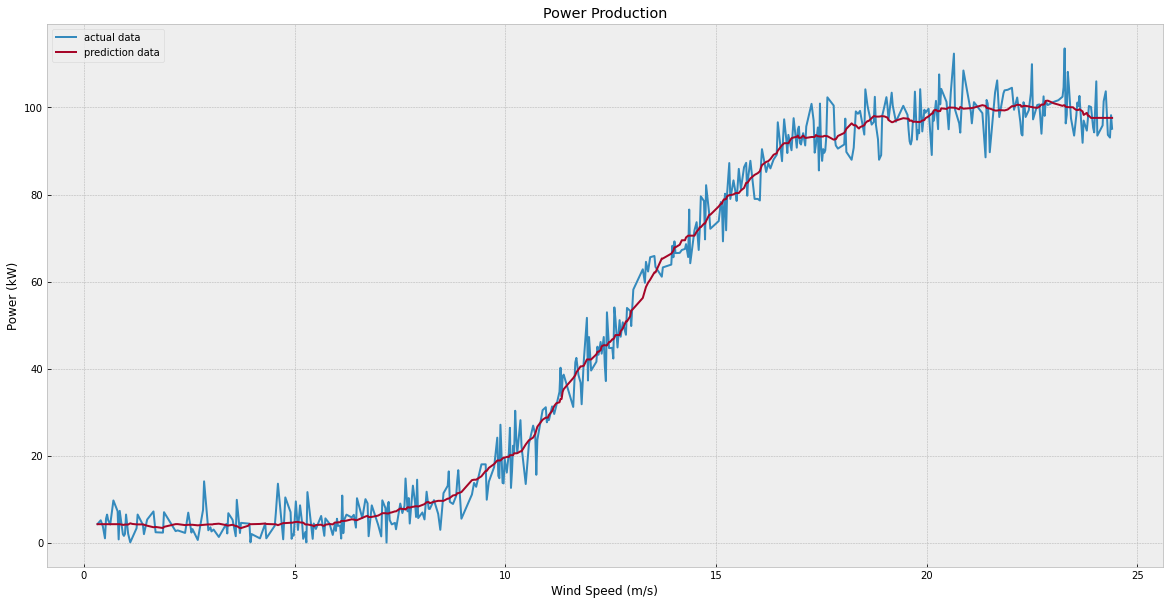

In [29]:
# Graph of the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(X, neigh.predict(X), label = "prediction data")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

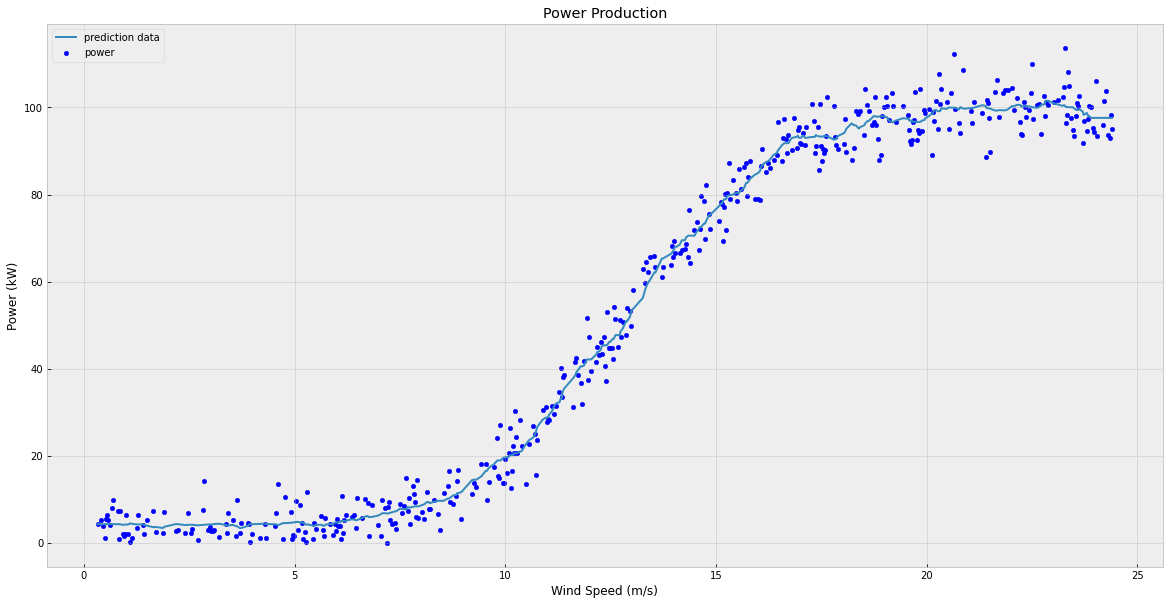

In [30]:
# Graph of the actual data with the predicted data.
speedPower.plot.scatter(x = "speed", y = "power", label = "power")
plt.plot(X, neigh.predict(X), label = "prediction data")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

#### Conclusion
K-nearest neighbours regression is accurate for predicting the power but when the input speed data is high, then the power prediction is the same as it would be for speeds that are a bit less than 25. This is probably because the outliers were removed but if they were kept in the results would less accurate. Quite a few of the high speeds in the data outputted 0 power and this is affecting the algorithm. If the data did not have outliers then it would be more accurate at higher speeds but even at the highest speeds, there is little difference in power output.

***
## Prediction Using Neural Networks

### Research
Neural networks or artificial neural networks (to avoid confusion with biological networks) are a series of algorithms that are designed to recognise patterns and relationships of data. A neuron is a mathematical function that collects and classifies information [7].

The input layer is the initial data for the neural network, the hidden layers are where all the calculations are done and it is between the input and output layers and the output layer produces the result [8].

<img src="https://miro.medium.com/max/625/1*3fA77_mLNiJTSgZFhYnU0Q.png" width="50%" title="Neural Network Architecture" alt="Neural Network Architecture">

<img src="https://www.investopedia.com/thmb/NOO1xErge30btK0nVZeEB6h_8xo=/2462x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/dotdash_Final_Neural_Network_Apr_2020-01-5f4088dfda4c49d99a4d927c9a3a5ba0.jpg" width="50%" title="A Simple Neural Network" alt="A Simple Neural Network">

### TensorFlow and Keras
Keras is a deep learning API written in Python. It runs on top of the machine learning platform TensorFlow. TensorFlow 2.0 is an end-to-end, open-source machine learning platform for Python [9].

### Linear Function
> It takes the inputs, multiplied by the weights for each neuron, and creates an output signal proportional to the input [11].

<img src="https://missinglink.ai/wp-content/uploads/2018/11/graphsright.png" title="Linear Graph" alt="Linear Graph" width="50%">

### Sigmoid Function
A sigmoid function is a mathematical function that has a characteristic of an S-shaped curve [12].  

The formula for a sigmoid function is:
\begin{equation}
S(x) = \frac {1}{1 + e^{-x}}
\end{equation}

Where<br>
$ S(x) $ = sigmoid function<br>
$ e $ = Euler's number

Graph of the Sigmoid Function:
<img src="https://miro.medium.com/max/3000/1*JHWL_71qml0kP_Imyx4zBg.png" title="Graph of the Sigmoid Function" alt="Graph of the Sigmoid Function" width="70%">

### Code

In [31]:
# Confirm that the correct data is being used.
train = pd.DataFrame()
train["x"] = speedPower["speed"]
train["y"] = speedPower["power"]
train

,x,y
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


### Using a Linear Activation Neuron

In [32]:
# Create a neural network with a single linear activation neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "one", bias_initializer = "zero"))
model.compile("adam", loss = "mean_squared_error")

In [33]:
# Fit the data to the model with epochs of 500.
model.fit(train["x"], train["y"], epochs = 500, verbose = 0)

In [34]:
# Predict this model on some values.
print("Test the data on wind speed values of 0, 5, 10, 15, 20, 25")
print(model.predict([0, 5, 10, 15, 20, 25]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

Test the data on wind speed values of 0, 5, 10, 15, 20, 25
[[  0.7565409]
 [ 22.601698 ]
 [ 44.446857 ]
 [ 66.29201  ]
 [ 88.13717  ]
 [109.98232  ]]
0 should output 0
5 is between an output of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an output of 72.135 and 73.911
20 is between an output of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


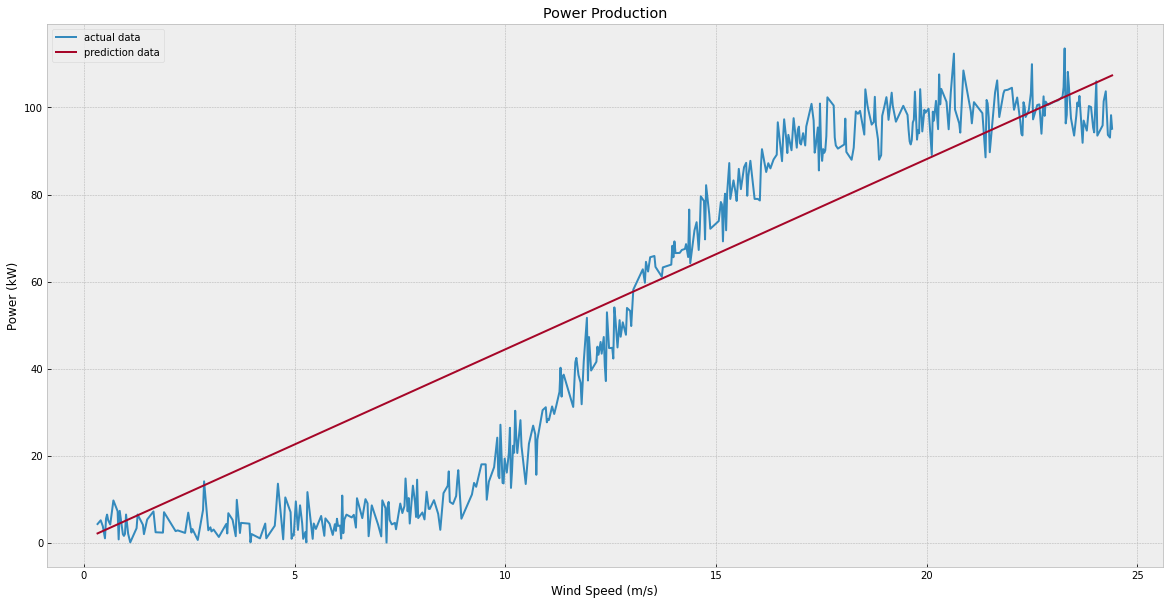

In [35]:
# Graph of the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(train["x"], model.predict(train["x"]), label = "prediction data")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

#### Conclusion
A neural network using one linear activation neuron is inaccurate most of the time.

### Using a Sigmoid Activation Neuron

In [36]:
# Create a neural network with a single sigmoid activation neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "one", bias_initializer = "zero"))
model.compile("adam", loss = "mean_squared_error")

In [37]:
# Fit the data to the model with epochs of 500.
model.fit(train["x"], train["y"], epochs = 500, verbose = 0)

In [38]:
# Predict this model on some values.
print("Test the data on wind speed values of 0, 5, 10, 15, 20, 25")
print(model.predict([0, 5, 10, 15, 20, 25]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

Test the data on wind speed values of 0, 5, 10, 15, 20, 25
[[0.935398]
 [1.      ]
 [1.      ]
 [1.      ]
 [1.      ]
 [1.      ]]
0 should output 0
5 is between an output of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an output of 72.135 and 73.911
20 is between an output of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


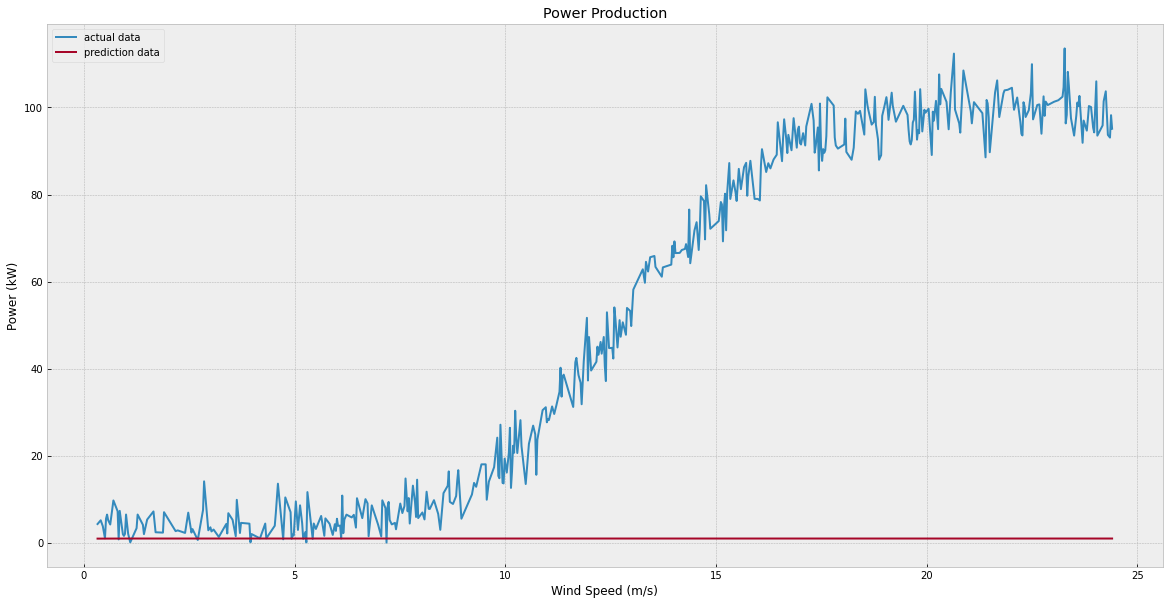

In [39]:
# Graph of the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(train["x"], model.predict(train["x"]), label = "prediction data")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

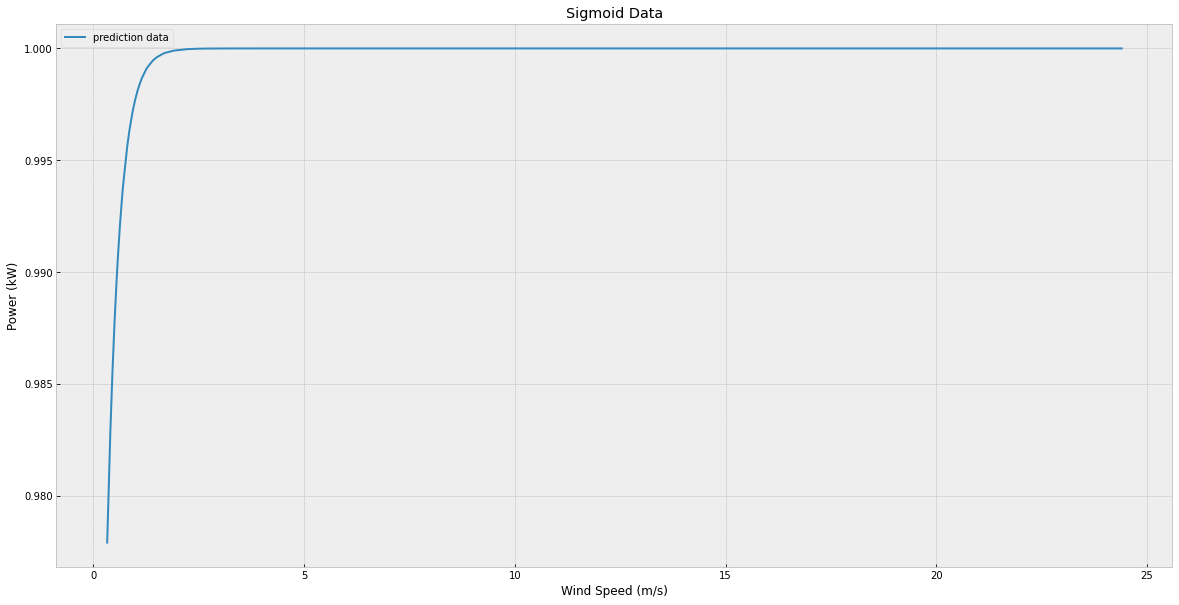

In [40]:
# Graph of the predicted data using a sigmoid activation.
plt.plot(train["x"], model.predict(train["x"]), label = "prediction data")
plt.title("Sigmoid Data")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

#### Conclusion
A neural network using one sigmoid activation neuron should not be used as nearly every input outputs a number that is nearly 1.

### Combining Sigmoid and Linear Activation Neurons

In [41]:
# Create a neural network with two sigmoid activation neurons and three linear activation neurons.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.compile("adam", loss = "mean_squared_error")

In [42]:
# Fit the data to the model with epochs of 1000.
model.fit(train["x"], train["y"], epochs = 1000, verbose = 0)

In [43]:
# Predict this model on some values.
print("Test the data on wind speed values of 0, 5, 10, 15, 20, 25")
print(model.predict([0, 5, 10, 15, 20, 25]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

Test the data on wind speed values of 0, 5, 10, 15, 20, 25
[[ 3.2687209]
 [ 4.8079643]
 [18.831102 ]
 [78.77732  ]
 [97.89907  ]
 [99.9832   ]]
0 should output 0
5 is between an output of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an output of 72.135 and 73.911
20 is between an output of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


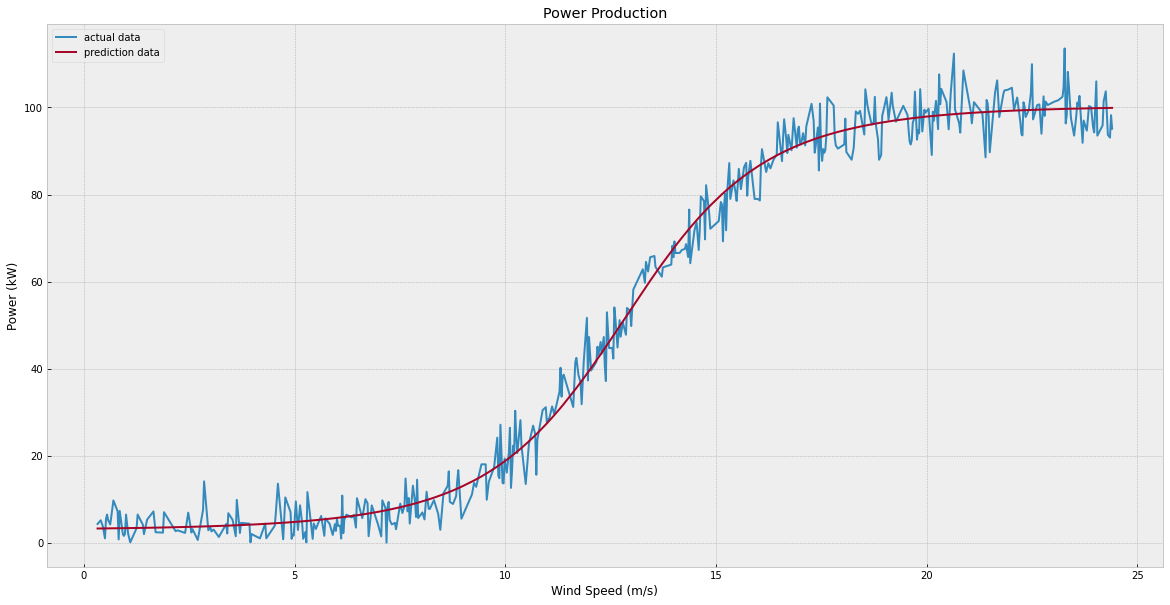

In [44]:
# Graph of the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(train["x"], model.predict(train["x"]), label = "prediction data")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

#### Conclusion
A neural network using two sigmoid activation neurons and three linear activation neurons provide an accurate result for input data.

### Combining Even More Sigmoid and Linear Activation Neurons

In [45]:
# This is probably overkill but this creates a neural network with three sigmoid activation neurons and five linear activation neurons.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.compile("adam", loss = "mean_squared_error")

In [46]:
# Fit the data to the model with epochs of 1000.
model.fit(train["x"], train["y"], epochs = 1000, verbose = 0)

In [47]:
# Predict this model on some values.
print("Test the data on wind speed values of 0, 5, 10, 15, 20, 25")
print(model.predict([0, 5, 10, 15, 20, 25]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

Test the data on wind speed values of 0, 5, 10, 15, 20, 25
[[  3.0826635]
 [  4.7871847]
 [ 19.072159 ]
 [ 78.6999   ]
 [ 98.139404 ]
 [100.668495 ]]
0 should output 0
5 is between an output of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an output of 72.135 and 73.911
20 is between an output of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


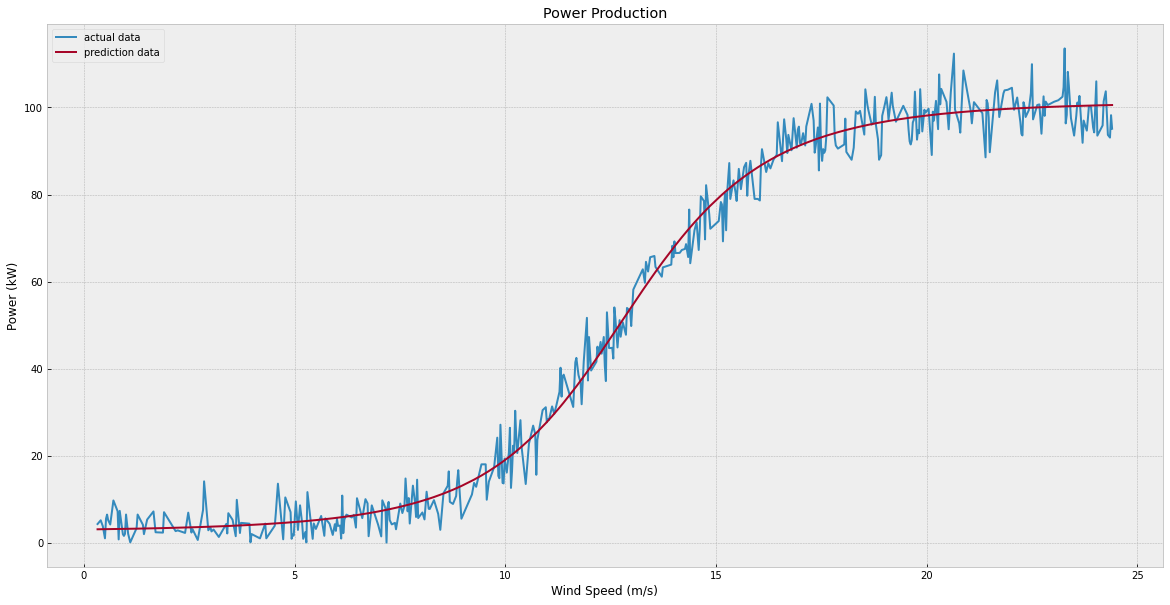

In [48]:
# Graph of the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(train["x"], model.predict(train["x"]), label = "prediction data")
plt.title("Power Production")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend(loc = "upper left")
plt.show()

In [49]:
# Save the final neural network model.
model.save("model.h5")

#### Conclusion
Even though it is overkill, a neural network using three sigmoid activation neurons and five linear activation neurons outputs accurate data and it is extremely similar to the results of the previous neural network.

***
## References
[1] Machine Learning; https://www.ibm.com/cloud/learn/machine-learning;

[2] K-Nearest Neighbor (K-NN); https://www.techopedia.com/definition/32066/k-nearest-neighbor-k-nn;

[3] Wind power; https://www.britannica.com/science/wind-power;

[4] Linear Regression for Machine Learning; https://machinelearningmastery.com/linear-regression-for-machine-learning/;

[5] sklearn.neighbors.KNeighborsRegressor; https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html;

[6] k-nearest neighbors algorithm; https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm;

[7] Neural Network; https://www.investopedia.com/terms/n/neuralnetwork.asp;

[8] Everything you need to know about Neural Networks and Backpropagation — Machine Learning Easy and Fun; https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a;

[9] About Keras; https://keras.io/about/;

[10] Understanding Polynomial Regression!!!; https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18;

[11] 7 Types of Neural Network Activation Functions: How to Choose?; https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/;

[12] Sigmoid Function; https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function;

[13] World’s Most Powerful Wind Turbine: One Rotation ‘Can Power the Average UK Home for a Day’; https://www.greentechmedia.com/articles/read/vattenfall-installs-worlds-most-powerful-wind-turbine;